In [1]:
# 复合分析
# 1.交叉分析
# 2.分组与钻取
# 3.相关分析
# 4.因子分析
# 5.聚类分析
# 6.回归分析

### 交叉分析

In [2]:
# 分析属性与属性之间的关系

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./data/HR.csv")
# df = df[df<df.quantile(0.75)+1.5*(df.quantile(0.75)-df.quantile(0.25))][df>df.quantile(0.25)-1.5*(df.quantile(0.75)-df.quantile(0.25))]
df = df[df["last_evaluation"]<1]

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low
14999,NaN,0.52,2,158,3,0,1,0,support,low


In [6]:
# 研究各个部门之间的离职率是否有差异，利用独立T检验方法

In [7]:
# 先按照部门进行分组,并得到分组后的索引
dp_indices = df.groupby(by='department').indices
dp_indices

{'IT': array([   59,    60,    61, ..., 14650, 14651, 14656]),
 'RandD': array([  289,   290,   291,   292,   431,   432,   433,   434,   574,
          575,   576,   577,   578,   791,   792,   793,   794,   934,
          935,   936,   937,   938,  1004,  1005,  1006,  1007,  1008,
         1155,  1156,  1225,  1226,  1227,  1228,  1229,  1298,  1299,
         1300,  1301,  1302,  1303,  1372,  1373,  1374,  1375,  1376,
         1377,  1447,  1448,  1449,  1450,  1451,  1522,  1523,  1524,
         1525,  1526,  1595,  1596,  1597,  1598,  1599,  1668,  1669,
         1670,  1671,  1737,  1738,  1739,  1740,  1741,  1811,  1812,
         1813,  1814,  1815,  1886,  1887,  1888,  1889,  1961,  1962,
         1963,  1964,  1965,  2036,  2037,  2038,  2039,  2040,  2112,
         2113,  2114,  2115,  2116,  2187,  2188,  2189,  2190,  2191,
         2262,  2263,  2264,  2265,  2266,  2338,  2339,  2340,  2341,
         2342,  2414,  2415,  2416,  2417,  2418,  2491,  2492,  2493,
     

In [8]:
# 选取其中的两组值进行分析
sales_values = df['left'].iloc[dp_indices['sales']].values
# sales_values
technical_values = df['left'].iloc[dp_indices['technical']].values
# 查看其T统计量
ss.ttest_ind(sales_values, technical_values)

Ttest_indResult(statistic=-0.7120485065071629, pvalue=0.47645949141272503)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


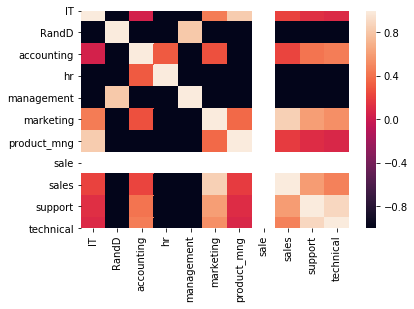

In [9]:
# 两两求p值
# 取键值 键值是各个部门的名字
dp_keys = list(dp_indices.keys())
# dp_keys
# 初始化一个矩阵 (全0矩阵)
dp_t_mat = np.zeros([len(dp_keys), len(dp_keys)])
# dp_t_mat
# 遍历
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        # 取p值 (求独立T检验值), 单独求P值索引取1
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values, df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        # 为矩阵赋值
        if p_value<0.05:
            dp_t_mat[i][j] = -1
        else:
            dp_t_mat[i][j] = p_value
# 利用heatmap画图 (颜色越深越接近于0，可认为两者之间没有关系)
sns.heatmap(dp_t_mat, xticklabels=dp_keys, yticklabels=dp_keys)
plt.show()

#### 通过透视表进行交叉分析

In [10]:
df = pd.read_csv("./data/HR.csv")
df = df[df["last_evaluation"]<1][df["salary"]!="nme"]
# 创建一个透视表 pivot_table 
# Work_accident 工作事故 0没有工作事故 1有工作事故
piv_tb = pd.pivot_table(df, values='left', index=['promotion_last_5years', 'salary'], columns=['Work_accident'], aggfunc=np.mean)
piv_tb

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.083503  0.000000
                      low     0.323983  0.087302
                      medium  0.223279  0.077098
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.000000

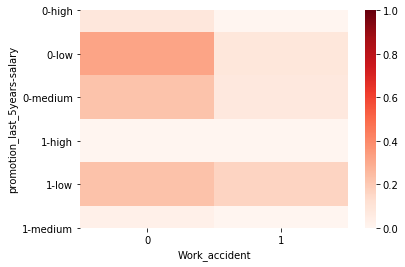

In [11]:
# 画图 (值越大，颜色越深，离职率越高)
# vmin 最小值  vmax 最大值
# cmap 自定义颜色
# 调整字体大小
sns.set_context(font_scale=1.5)
sns.heatmap(piv_tb, vmin=0, vmax=1, cmap=sns.color_palette('Reds', n_colors=256))
plt.show()

### 分组分析 

In [12]:
# 两种不同的含义
# 含义1:将数据分组后再进行分析比较
# 含义2:根据数据的特征将数据进行切分，分成不同的组，使得组内成员尽可能靠拢，组间的成员尽可能远离。

In [13]:
# 分组分析最常用到的手段就是钻取
# 钻取：是改变维的层次，变换分析的粒度
# 根据钻取方向的不同可以分为
# 向上钻取：就是汇总分组数据的过程。比如知道每个人的平均数，汇总成每个班的平均数。
# 向下钻取：就是展开数据，查看数据细节的过程。比如想要知道每个班平均成绩下，男生和女生分别的平均成绩

In [14]:
# 离散属性的分组比较容易。连续属性的分组，在分组前需要进行离散化，在进行离散化之前还要观察数据的分布，观察是否有明显的可以区分的标志，比如
# 将数据按照从小到大的顺序排列后，观察是否有明显的分割点或拐点，如果有可以直接使用
# 分割（一阶差分），相邻两个数据的差
# 拐点（二阶差分）
# 思路二：
# 连续属性的分组要尽可能满足相同的分组比较聚拢，不同的分组比较分离的特点。因此可以使用聚类的方法进行连续属性的分组。方法k-means、不纯度Gini

In [15]:
# 衡量不纯度的指标，Gini系数
# 连续值Gini系数的计算
# 1.先将表按照连续值的大小进行排序。
# 2.然后相邻两两之间划定界限，分别确定分组值，分别计算Gini系数，取Gini系数最小的切分为界。
# 3.最后根据目标标注对连续值进行分组

##### 代码实现

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


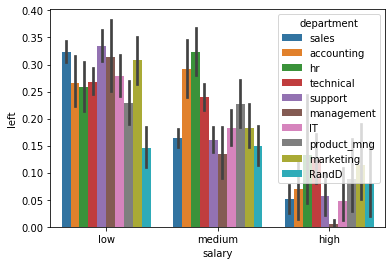

In [16]:
df = pd.read_csv("./data/HR.csv")
df = df[df["last_evaluation"]<1][df["salary"]!="nme"]
# hue 向下钻取
sns.barplot(x='salary', y='left', hue='department', data=df)
plt.show()

In [ ]:
# 连续值
df = pd.read_csv("./data/HR.csv")
# df = df[df["last_evaluation"]<1][df["salary"]!="nme"]
sl_s = df['satisfaction_level']
# sl_s.sort_values().dropna()
# list(range(len(sl_s.sort_values().dropna())))
# y轴根据值进行排序
sns.barplot(list(range(len(sl_s.sort_values().dropna()))), sl_s.sort_values().dropna())
plt.show()

### 相关分析

In [19]:
# 相关分析是衡量两组数据或两组样本分布趋势或者变化趋势大小的分析方法，常用的方法，相关系数，用相关系数直接衡量相关性的大小，最为直接和方便。

In [18]:
df = pd.read_csv("./data/HR.csv")
df = df[df["last_evaluation"]<1][df["salary"]!="nme"]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


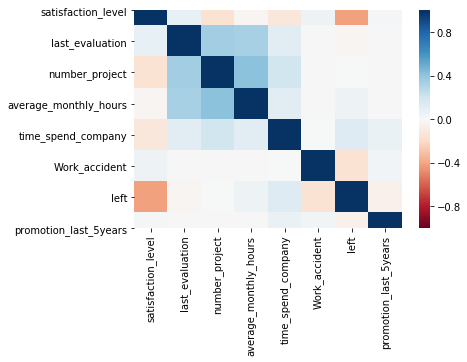

In [19]:
# 根据相关系数画相关图(计算相关系数时会自动去除离散属性)
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.color_palette('RdBu', n_colors=128))
plt.show()

In [20]:
# 二类离散属性 例如；一个是0，一个是1. 可以使用皮尔逊相关系数直接进行衡量
# 也可以使用熵进行计算
# 熵：用来衡量不确定性的一个值。越接近与0，则不确定性越小。
# 条件熵：相对于原来的熵一定是减少了
# 互信息（熵增益）：含义可理解为这个过程中减少的熵。
# 熵增益率：X到Y的增益率是X，Y的互信息除以Y的熵   0< H <1
# 相关性

##### 代码实现

In [23]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

s1 = pd.Series(["X1", "X1", "X2", "X2", "X2", "X2"])
s2 = pd.Series(["Y1", "Y1", "Y1", "Y2", "Y2", "Y2"])

# 定义熵
def getEntropy(s):
    # 判断数据是否是Series
    if not isinstance(s, pd.core.series.Series):
        s = pd.Series(s)
    # 确定其分布 
    # count()得到数量，.values转换成np.array的结构。最后除以数量得其分布
    prt_ary = pd.DataFrame.groupby(s, by=s).count().values/float(len(s))
    # 返回求和
    return -(np.log2(prt_ary)*prt_ary).sum()

print(getEntropy(s2))    

1.0


In [24]:
# 条件熵 (条件s1下s2的条件熵)
def getCondEntropy(s1, s2):
    # 需要先求出s1的分布
    d = dict()
    for i in list(range(len(s1))):
        # 构造一个结构体 结构体的key是s1的值，value是一个数组，数组记录了s1值下s2的分布
        d[s1[i]] = d.get(s1[i], []) + [s2[i]]
    return sum([getEntropy(d[k])*len(d[k])/float(len(s1)) for k in d])
print("CondEntropy", getCondEntropy(s1, s2))

CondEntropy 0.5408520829727552


In [25]:
# 熵增益
def getEntropyGain(s1, s2):
    # s2的熵-s1条件下s2的熵
    return getEntropy(s2)-getCondEntropy(s1, s2)
print("EntryopyGain", getEntropyGain(s1, s2))

EntryopyGain 0.4591479170272448


In [27]:
# 增益率
def getEntropyGainRatio(s1, s2):
    # s1条件下对s2的熵增益除以s2的熵
    return getEntropyGain(s1, s2)/getEntropy(s2)
print("EntropyGainRatio", getEntropyGainRatio(s1, s2))

EntropyGainRatio 0.4591479170272448


In [28]:
# 衡量离散值的相关性
import math
def getDiscreteCorr(s1, s2):
    # 熵增益除以s1,s2熵的积再开方
    return getEntropyGain(s1, s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))
print("DiscreteCorr", getDiscreteCorr(s1, s2))

DiscreteCorr 0.4791387674918639


In [29]:
# Gini系数
# 定义一个求概率平方和的函数
def getProbSS(s):
     # 判断数据是否是Series
    if not isinstance(s, pd.core.series.Series):
        s = pd.Series(s)
    # 确定其分布 
    # count()得到数量，.values转换成np.array的结构。最后除以数量得其分布
    prt_ary = pd.DataFrame.groupby(s, by=s).count().values/float(len(s))
    # 返回平方和
    return sum(prt_ary**2)

# 计算Gini
def getGini(s1, s2):
    # 需要先求出s1的分布
    d = dict()
    for i in list(range(len(s1))):
        # 构造一个结构体 结构体的key是s1的值，value是一个数组，数组记录了s1值下s2的分布
        d[s1[i]] = d.get(s1[i], []) + [s2[i]]
    return  1-sum([getProbSS(d[k])*len(d[k])/float(len(s1)) for k in d])
print("Gini", getGini(s1, s2))

Gini 0.25
